In [13]:
using PerlaTonettiWaugh, Parameters, Plots, DataFrames, Optim, LaTeXStrings

┌ Info: Precompiling PerlaTonettiWaugh [d2cacc76-b06b-11e8-362b-f18d03a16405]
└ @ Base loading.jl:1273


In [14]:
params_minimal = parameter_defaults(γ = 1)
settings = settings_defaults();

In [15]:
function constrained_equilibrium(ζ_p, params)
    params_constrained = merge(params, (ζ_p = ζ_p, ζ = 1.0))

#     χ_p = params_minimal.ζ/ζ_p * params_minimal.χ # use global defaults 
#     params_constrained = merge(params_constrained, (χ_p = χ_p,))

    CE_constrained = stationary_algebraic(params_constrained, settings) # competitive equilibrium
end

constrained_equilibrium (generic function with 1 method)

### Experiment 1: (Constrained) Planner's Welfare for Baseline Parameters 

In [16]:
d_0 = 3.0426
d_baseline = d_0
params_baseline = merge(params_minimal, (d = d_baseline,));

ζ_range_baseline = params_baseline.ζ-0.1:0.005:params_baseline.ζ+1.0
equilibria_baseline = [constrained_equilibrium(x, params_baseline) for x in ζ_range_baseline]

welfares_baseline = [sol.U_bar for sol in equilibria_baseline]
cs_baseline = [sol.c for sol in equilibria_baseline]
gs_baseline = [sol.g for sol in equilibria_baseline];

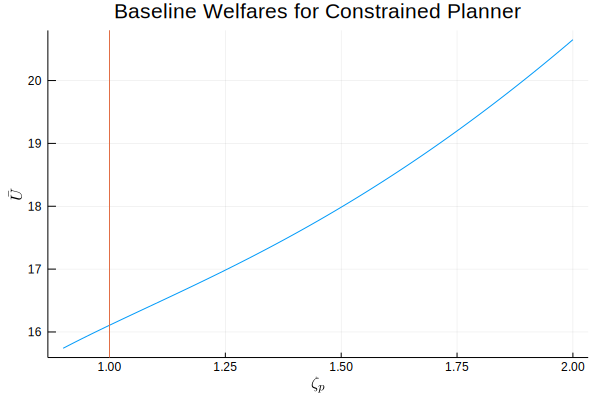

In [17]:
plot(ζ_range_baseline, welfares_baseline, title = "Baseline Welfares for Constrained Planner", xlabel = L"\zeta_p", ylabel = L"\bar{U}", legend = false)
vline!([1.0])

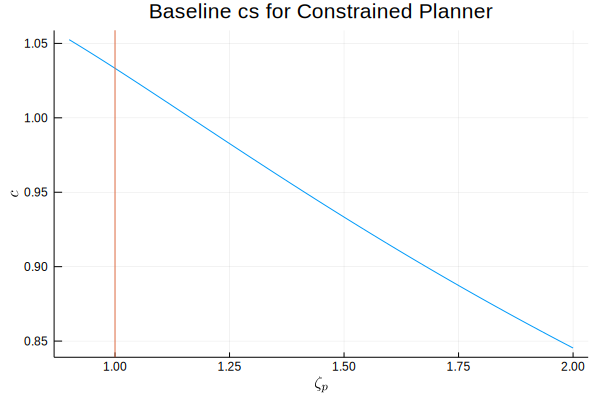

In [18]:
plot(ζ_range_baseline, cs_baseline, title = "Baseline cs for Constrained Planner", xlabel = L"\zeta_p", ylabel = L"c", legend = false)
vline!([1.0])

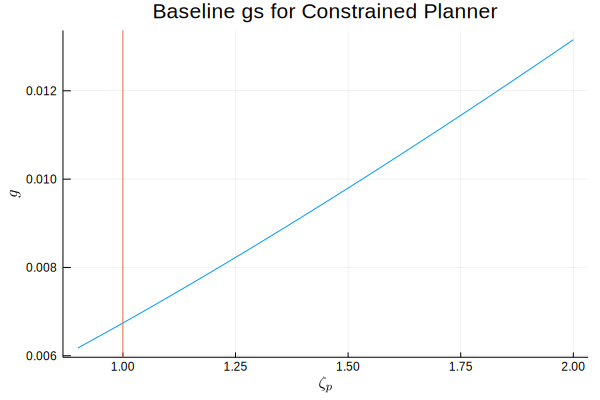

In [19]:
plot(ζ_range_baseline, gs_baseline, title = "Baseline gs for Constrained Planner", xlabel = L"\zeta_p", ylabel = L"g", legend = false)
vline!([1.0])

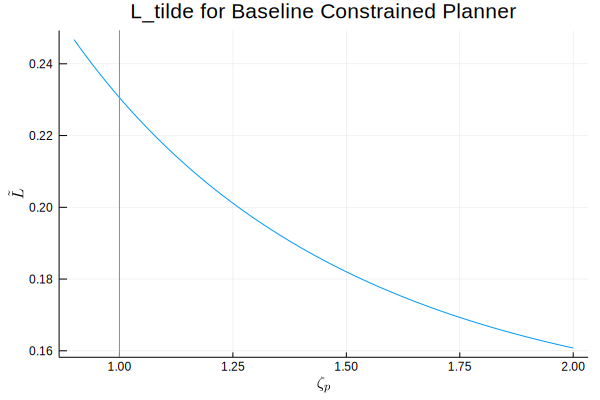

In [20]:
plot(ζ_range_baseline, [sol.L_tilde for sol in equilibria_baseline], title = "L_tilde for Baseline Constrained Planner", xlabel = L"\zeta_p", ylabel = L"\tilde{L}", legend = false)
vline!([1.0])

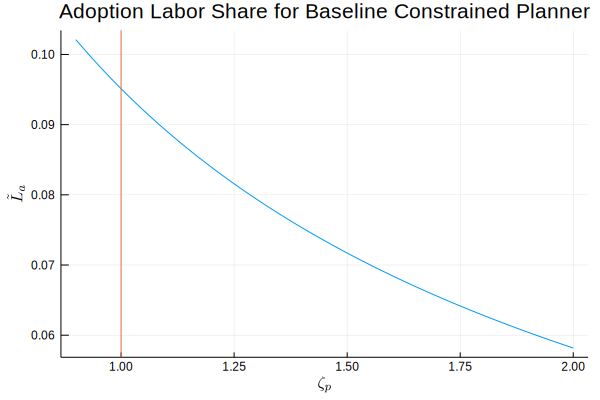

In [21]:
plot(ζ_range_baseline, [sol.L_tilde_a for sol in equilibria_baseline], title = "Adoption Labor Share for Baseline Constrained Planner", xlabel = L"\zeta_p", ylabel = L"\tilde{L}_a", legend = false)
vline!([1.0])

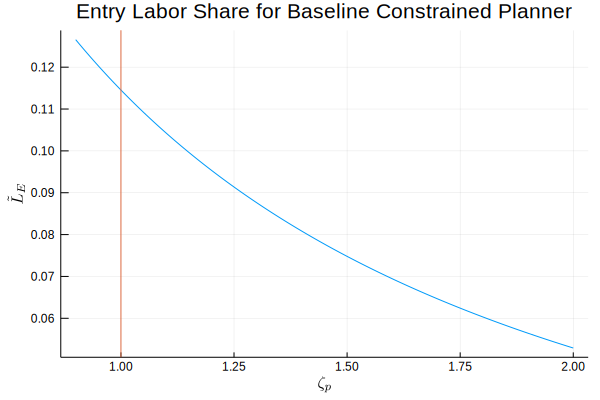

In [22]:
plot(ζ_range_baseline, [sol.L_tilde_E for sol in equilibria_baseline], title = "Entry Labor Share for Baseline Constrained Planner", xlabel = L"\zeta_p", ylabel = L"\tilde{L}_E", legend = false)
vline!([1.0])

### Experiment 2: (Constrained) Planner's Welfare for Lower Trade Costs

In [23]:
d_T =  2.83834
d_lower = d_T
params_lower = merge(params_minimal, (d = d_lower,));

ζ_range_lower = params_lower.ζ-0.1:0.01:params_lower.ζ+0.45
equilibria_lower = [constrained_equilibrium(x, params_lower) for x in ζ_range_lower]

welfares_lower = [sol.U_bar for sol in equilibria_lower]
cs_lower = [sol.c for sol in equilibria_lower]
gs_lower = [sol.g for sol in equilibria_lower];

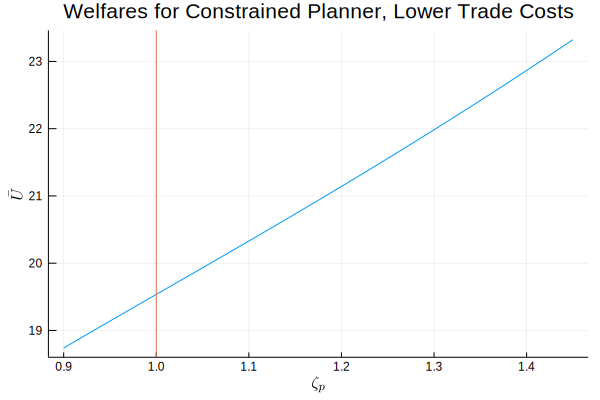

In [24]:
plot(ζ_range_lower, welfares_lower, title = "Welfares for Constrained Planner, Lower Trade Costs", xlabel = L"\zeta_p", ylabel = L"\bar{U}", legend = false)
vline!([1.0])

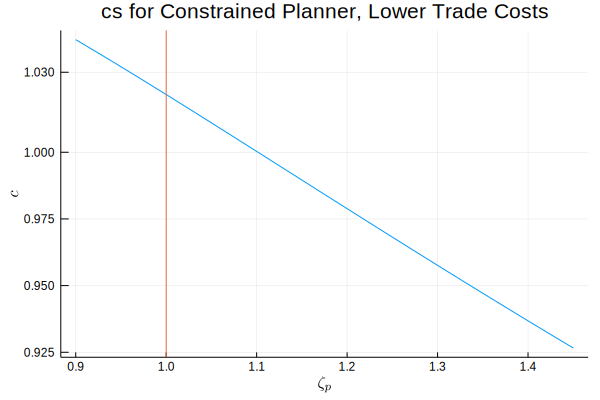

In [25]:
plot(ζ_range_lower, cs_lower, title = "cs for Constrained Planner, Lower Trade Costs", xlabel = L"\zeta_p", ylabel = L"c", legend = false)
vline!([1.0])

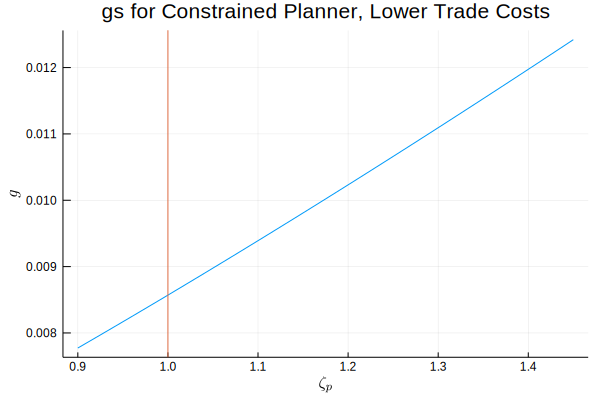

In [26]:
plot(ζ_range_lower, gs_lower, title = "gs for Constrained Planner, Lower Trade Costs", xlabel = L"\zeta_p", ylabel = L"g", legend = false)
vline!([1.0])